# ML Mini-Project

1. Import modules
2. Load the data
3. Transform Data
4. Divide data into training/testing set
5. Create empty model
6. Fit/train the model
7. Evaluate the model

## Problem formulation: 
Predict life expectancy for a country based on alcohol consumption

### 1. Import Modules

In [6]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### 2. Load data

In [7]:
# Create data path
DATA_PATH = f'{os.path.abspath("")}/data'

# Load data from files
life_expectancy_data = pd.read_csv(f'{DATA_PATH}/Life Expectancy Data.csv')

### 3. Transform data

In [31]:
life_expectancy_data.columns

for col_name in life_expectancy_data.columns:
    new_col_name = col_name.strip(" ")

    life_expectancy_data.rename(columns = {col_name: new_col_name}, inplace=True)

alc_df = life_expectancy_data[["Life expectancy", "Alcohol"]]

# Inspect DataFrame
life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### 4. Divide data into training/testing set

In [342]:
mydf = life_expectancy_data[["Alcohol", "Schooling", "Life expectancy", 'GDP']]
mydf.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(mydf[["Alcohol",'GDP','Schooling']], mydf["Life expectancy"])

km_df = pd.DataFrame().assign(Alcohol=life_expectancy_data['Alcohol'], Life_expectancy=life_expectancy_data['Life expectancy'])
km_df.fillna('-1', inplace=True)
X_km = np.array([np.array(km_df['Alcohol'].values), np.array(km_df['Life_expectancy'].values)])
# leng = int(len(X_km) / 2)
# X_km = np.reshape(X_km, (leng, 2))
# X_km
print(len(X_km[0]))
print(len(X_km[1]))
km_df

2938
2938


C:\Users\mcvk\AppData\Local\Temp\ipykernel_47308\2393835232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf.dropna(inplace=True)


,Alcohol,Life_expectancy
0,0.01,65.0
1,0.01,59.9
2,0.01,59.9
3,0.01,59.5
4,0.01,59.2
...,...,...
2933,4.36,44.3
2934,4.06,44.5
2935,4.43,44.8
2936,1.72,45.3


### 5. Create empty model

In [274]:
model_lr = LinearRegression()

### 6. Fit/train the model

In [356]:
# Linear Regression
model_lr.fit(X_train, y_train)

pred = model_lr.predict(X_test)


# KMeans
estimators = [
    ("k_means_3", KMeans(n_clusters=3, n_init=1)),
    ("k_means_5", KMeans(n_clusters=5, n_init=1)),
    ("k_means_8", KMeans(n_clusters=8, n_init=1)),
]

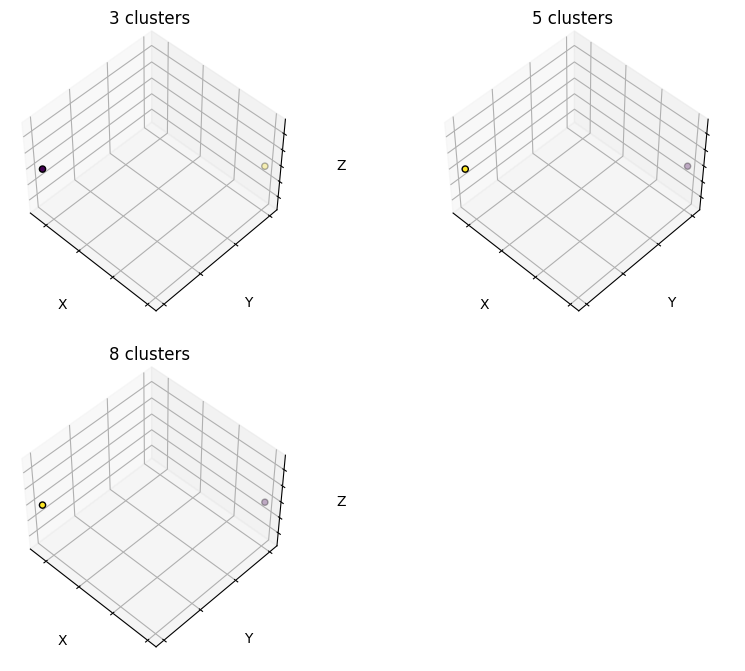

In [367]:
fig = plt.figure(figsize=(10, 8))
titles = ['3 clusters', '5 clusters', '8 clusters']

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit_predict(X_km)
    labels = est.labels_

    ax.scatter(X_km[:,0], X_km[:,1], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)

# ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

# for name, label in [("Alcohol", 0), ("Life expectancy", 1)]:
#     ax.text3D(
#         X[y == label, 2].mean(),
#         X[y == label, 0].mean(),
#         name,
#         horizontalalignment="center",
#         bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
#     )
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# ax.set_title("Test")

# plt.subplots_adjust(wspace=0.25, hspace=0.25)
# plt.show()

### 7. Evaluate the model

In [256]:
from sklearn.metrics import r2_score
clf= model_lr
y_pred = model_lr.predict(X_test)
accuracy = clf.score(X_test, pd.DataFrame(y_pred, columns=["Life expectancy"]))
# co= confusion_matrix(X_test, y_pred)
# print(type(y_test), type(y_pred), y_pred.shape)
# print("Accuracy: {:.2f}%".format(accuracy*100))
# print("confusion Matrix: \n", co
r2 = r2_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(r2*100))

Accuracy: 57.28%


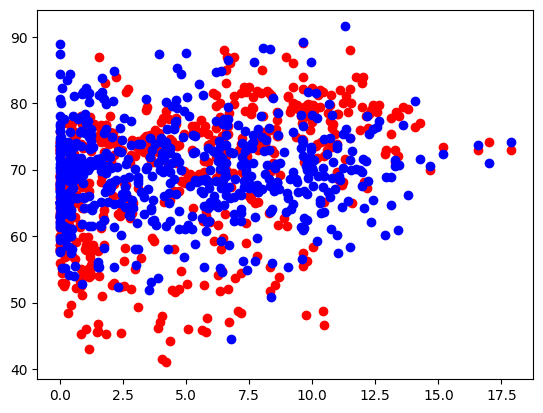

In [120]:
# print(y_test-pred) ## Offset for our prediction
plt.plot(X_test["Alcohol"], y_test, 'o', color='red') # Felet var att y_test inte kan representeras som en linje smidigt.
plt.plot(X_test["Alcohol"], pred, 'o', color="blue")
plt.show()